In [1]:
import Image
import glob
import os
import IPython.display
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import numpy as np
import cv2, glob
import sys
import os

In [3]:
filename = "../../data/dr_sample/10_left.jpeg"

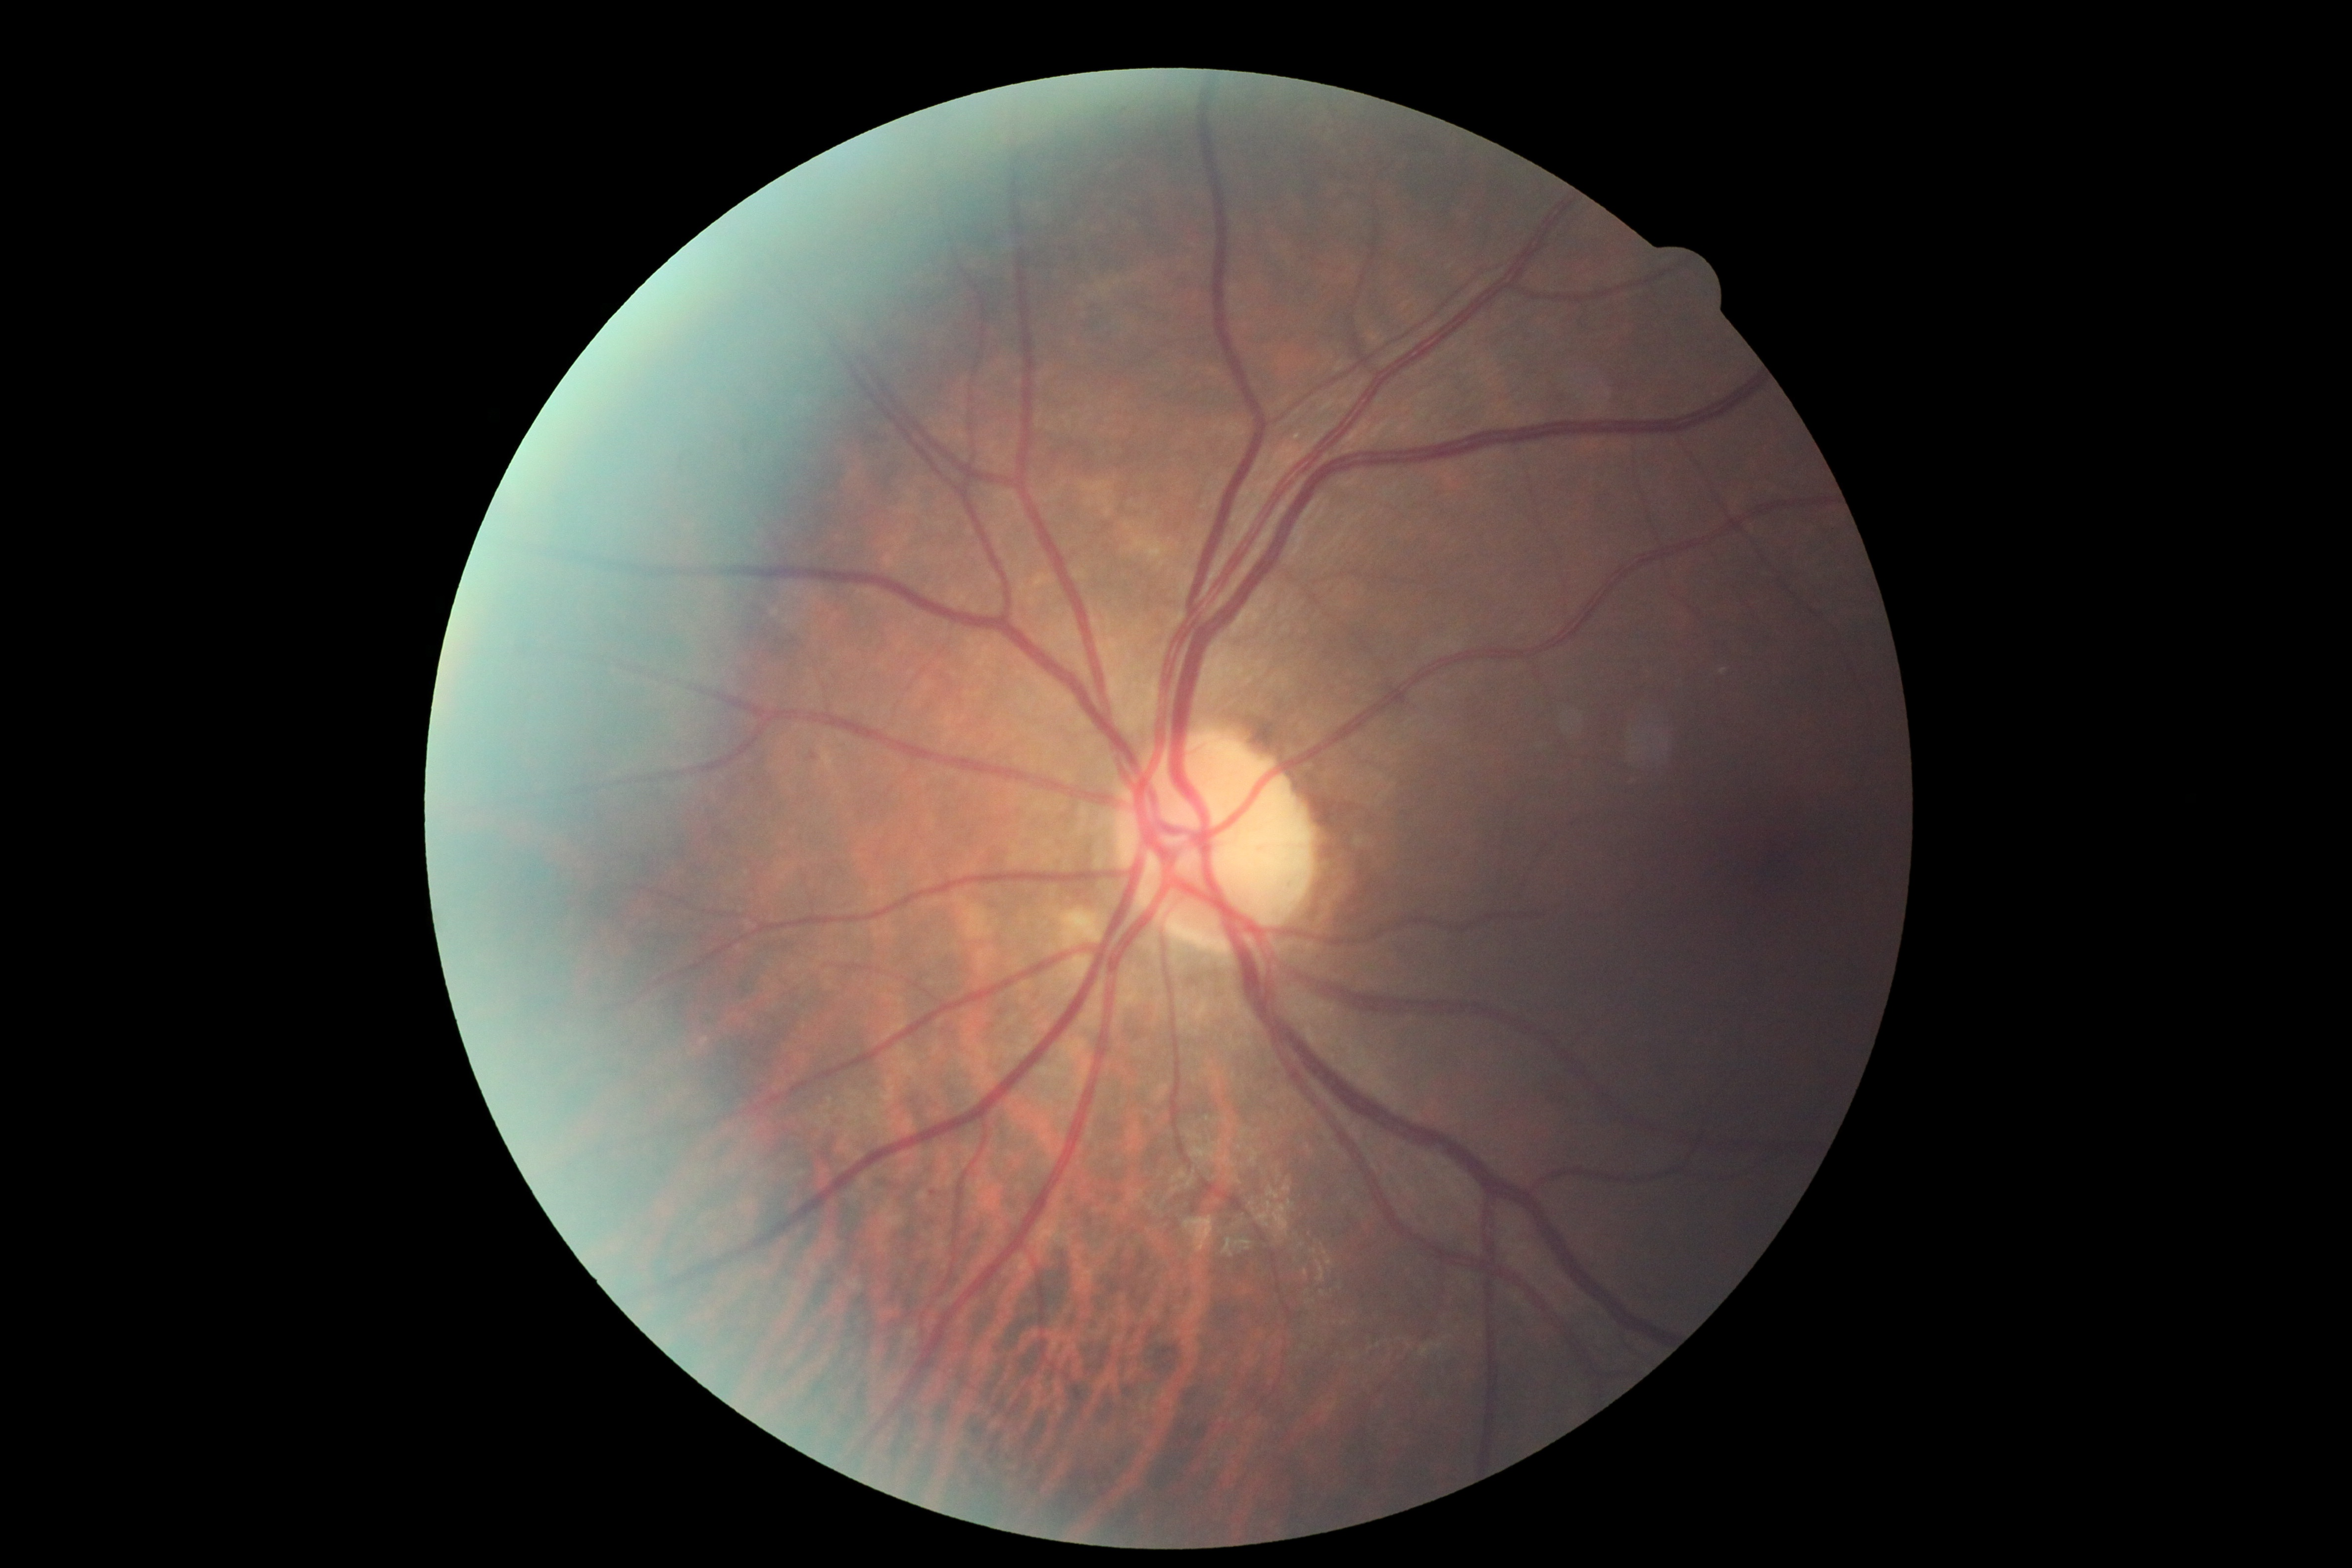

In [4]:
IPython.display.Image(filename, width=500, height=300)

In [5]:
a = cv2.imread(filename)

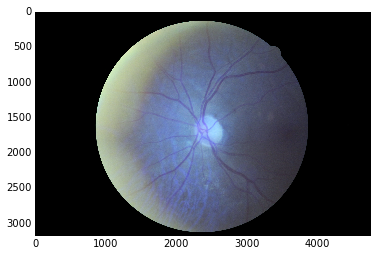

In [6]:
plt.imshow(a, cmap=plt.cm.gray, vmin=0, vmax=1)

In [7]:
scale=300

In [7]:
s=scale*1.0/r

NameError: name 'r' is not defined

In [8]:
def scaleRadius(img, scale):
    x = img[img.shape[0]/2,:,:].sum(1)
    r = (x>x.mean()/10).sum()/2

    # hacky fix for corrupted images??
    if r == 0:
        return img

    s=scale*1.0/r
    return cv2.resize(img, (0,0), fx=s, fy=s)

In [9]:
scaled_img = scaleRadius(a, 300)
print scaled_img.shape

(632, 948, 3)


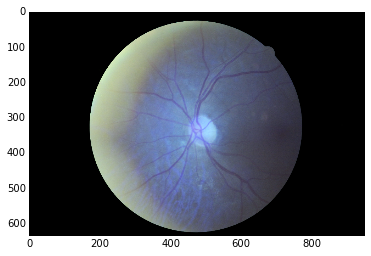

In [10]:
plt.imshow(scaled_img, cmap=plt.cm.gray, vmin=0, vmax=1)

----

In [14]:
scale/30

10

In [30]:
?cv2.GaussianBlur

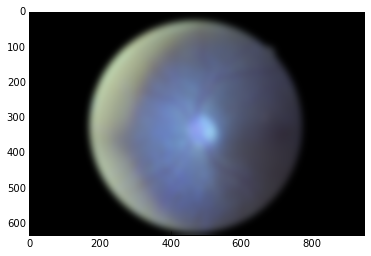

In [11]:
blur = cv2.GaussianBlur(scaled_img, (0,0), scale/30)
gauss_img = cv2.addWeighted(scaled_img, 4, blur, -4, 128)
# gauss_img = cv2.addWeighted(scaled_img, 4, blur, -4, 128)
plt.imshow(blur, cmap=plt.cm.gray, vmin=0, vmax=1)

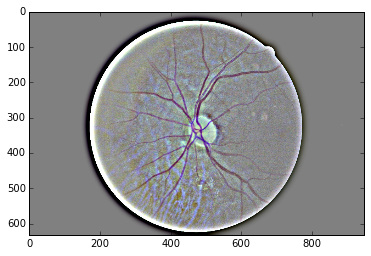

In [12]:
plt.imshow(gauss_img, cmap=plt.cm.gray, vmin=0, vmax=1)

In [63]:
blur2 = cv2.GaussianBlur(scaled_img, (55,55), scale/30)
gauss_img2 = cv2.addWeighted(scaled_img, 4, blur2, -4, 128)
# gauss_img = cv2.addWeighted(scaled_img, 4, blur, -4, 128)
float(sum(sum(sum(np.equal(gauss_img, gauss_img2))))) / 1797408.0

1.0

In [79]:
print scaled_img.shape
print blur.shape

(632, 948, 3)
(632, 948, 3)


In [74]:
print blur.shape
print a.shape
print 3168/623, 4752/948, scale/30

(632, 948, 3)
(3168, 4752, 3)
5 5 10


mean = (0,0), sigma = (scale/30, scale/30)

In [63]:
cv2.GaussianBlur(scaled_img, (0,0), scale/30).shape

(632, 948, 3)